The imports

In [33]:
import numpy
import pandas as pd
import yfinance as yf
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

Outputting the price table of a certain stock, which is currently Apple

In [34]:
stock = 'AAPL'

data_for_stock = yf.Ticker(stock)
data_for_stock = data_for_stock.history(period="8y")

del data_for_stock["Dividends"]

data_for_stock

,Open,High,Low,Close,Volume,Stock Splits
Date,,,,,,
2016-01-25 00:00:00-05:00,23.105777,23.108053,22.580025,22.632374,207178000,0.0
2016-01-26 00:00:00-05:00,22.743892,22.960110,22.320559,22.757547,300308000,0.0
2016-01-27 00:00:00-05:00,21.858538,21.992820,21.244022,21.262230,533478800,0.0
2016-01-28 00:00:00-05:00,21.346442,21.512588,21.027804,21.414721,222715200,0.0
2016-01-29 00:00:00-05:00,21.574044,22.154419,21.473900,22.154419,257666000,0.0
...,...,...,...,...,...,...
2024-01-17 00:00:00-05:00,181.270004,182.929993,180.300003,182.679993,47317400,0.0
2024-01-18 00:00:00-05:00,186.089996,189.139999,185.830002,188.630005,78005800,0.0
2024-01-19 00:00:00-05:00,189.330002,191.949997,188.820007,191.559998,68741000,0.0


The below is to plot the stocks over time.

Text(0.5, 1.0, 'The Stock Price')

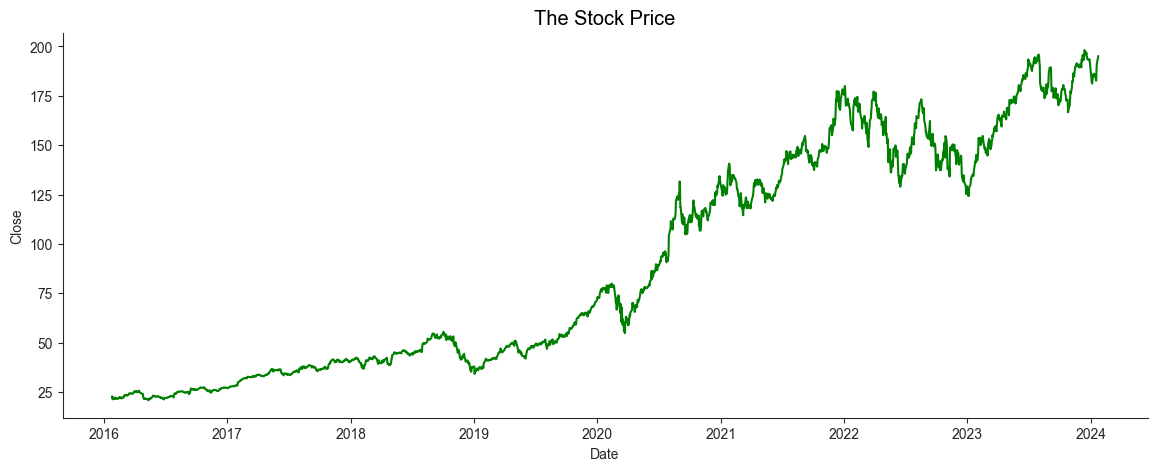

In [35]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=data_for_stock,x="Date",y='Close',color='green')
sns.despine()
plt.title("The Stock Price",size='x-large',color='black')

Creating the training and testing data

In [36]:
import sklearn

60


Text(0.5, 1.0, 'The Training Data')

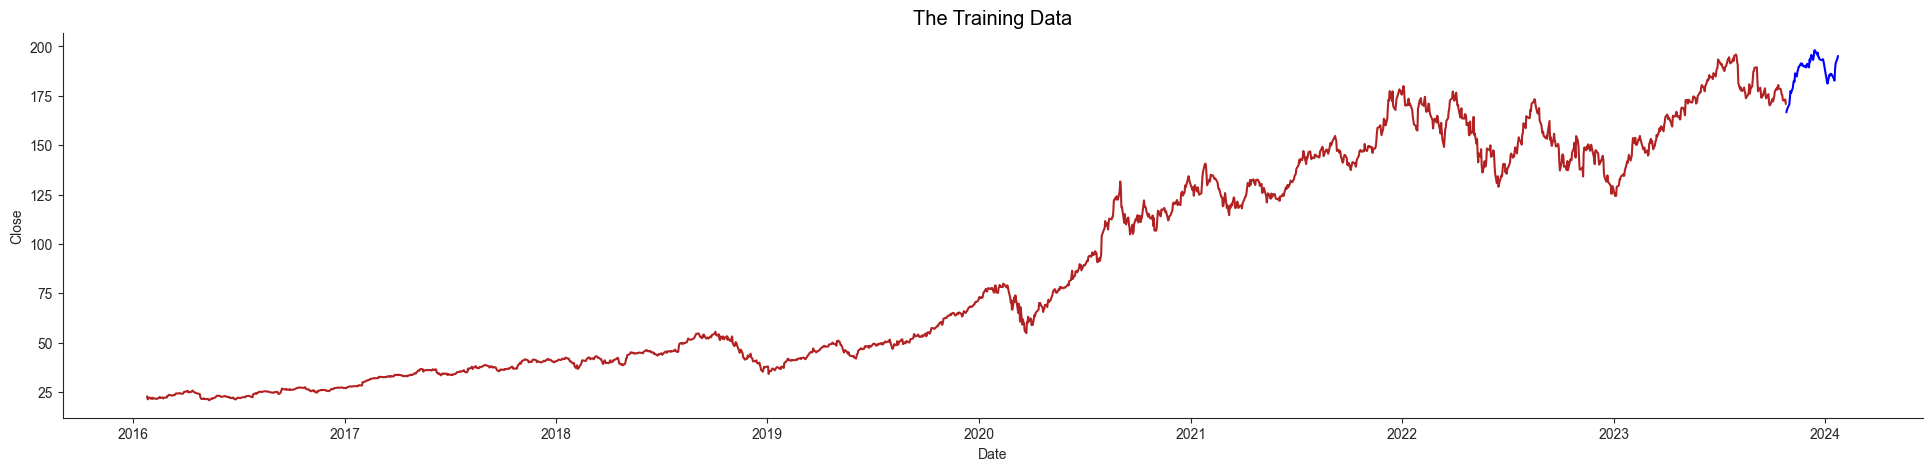

In [37]:
train_d = data_for_stock[-1*len(data_for_stock)+ 1:-60]
test_d = data_for_stock[-60:]

print(len(test_d))

plt.figure(figsize=(24,5))
sns.set_style("ticks")
sns.lineplot(data=train_d,x="Date",y='Close',color='firebrick')
sns.lineplot(data=test_d,x="Date", y='Close', color='blue')
sns.despine()
plt.title("The Training Data",size='x-large',color='black')

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=1)
predictors = ["Open", "Low","High","Volume"]
model = model.fit(train_d[predictors], train_d["Close"])

In [39]:
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor(max_depth=10, random_state=0)
# predictors = ["Open", "High", "Low", "Volume"]
# model = model.fit(train_d[predictors], train_d["Close"])

In [42]:
from sklearn.metrics import explained_variance_score

predictions = model.predict(test_d[predictors])

count = 0
print("Predicted\t\tActual")

for i in range(len(test_d)):
    print(str(predictions[i]) + "\t" + str(test_d["Close"][i]))
    if (abs(test_d["Close"][i] - predictions[i]) <= 0.01* test_d["Close"][i]):
        count += 1
print("\n" + str(count / len(test_d)))
explained_variance_score(test_d["Close"], predictions)

Predicted		Actual
168.3432071939985	166.67042541503906
167.78771532955022	167.99867248535156
170.7330565675473	170.06593322753906
169.1468308932013	170.54531860351562
172.3962738032674	173.74110412597656
176.56391136229053	177.3363800048828
174.57871984870502	176.41757202148438
177.60446406432865	178.9941864013672
180.51084599812825	181.58078002929688
182.77094512503487	182.6493682861328
183.25792090400816	182.1699981689453
185.57894768269855	186.39999389648438
185.1745178222656	184.8000030517578
187.56569300333658	187.44000244140625
188.88625062334978	188.00999450683594
190.1716286775296	189.7100067138672
190.1312877114109	189.69000244140625
190.43702572341192	191.4499969482422
190.8822058919271	190.63999938964844
192.47508326769633	191.30999755859375
190.14815296136766	189.97000122070312
190.26024374220108	189.7899932861328
190.0882185741606	190.39999389648438
190.57550599888393	189.3699951171875
189.77479412518858	189.9499969482422
190.53928468540738	191.24000549316406
189.656331568

0.9805878682485926